In [1]:
import pandas as pd

filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes = filmes.set_index("filmeId")
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [2]:
notas = pd.read_csv("ratings.csv")
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [3]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,1.176722e+07,1.176722e+07,1.176722e+07,1.176722e+07
mean,6.049901e+04,1.827968e+04,3.528688e+00,1.192050e+09
std,3.497887e+04,3.485619e+04,1.070083e+00,2.161131e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,3.038300e+04,1.097000e+03,3.000000e+00,9.979242e+08
50%,6.055800e+04,2.710000e+03,3.500000e+00,1.172212e+09
75%,9.107100e+04,7.099000e+03,4.000000e+00,1.421270e+09
max,1.207260e+05,1.938820e+05,5.000000e+00,1.537945e+09


# Primeira tentativa de recomendação: heurística de total de votos

In [4]:
total_de_votos = notas["filmeId"].value_counts()
total_de_votos.head()

318     41742
356     41104
296     39202
593     37380
2571    35795
Name: filmeId, dtype: int64

In [5]:
filmes['total_de_votos'] = total_de_votos
filmes.head()

,titulo,generos,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,29053.0
2,Jumanji (1995),Adventure|Children|Fantasy,11414.0
3,Grumpier Old Men (1995),Comedy|Romance,6735.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1292.0
5,Father of the Bride Part II (1995),Comedy,6608.0


In [6]:
filmes.sort_values("total_de_votos", ascending = False).head(10)

,titulo,generos,total_de_votos
filmeId,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,41742.0
356,Forrest Gump (1994),Comedy|Drama|Romance|War,41104.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,39202.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,37380.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,35795.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,34656.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,32473.0
527,Schindler's List (1993),Drama|War,30493.0
110,Braveheart (1995),Action|Drama|War,29241.0


In [7]:
notas_medias = notas.groupby("filmeId").mean()["nota"]
notas_medias.head()

filmeId
1    3.886862
2    3.246539
3    3.185375
4    2.878870
5    3.080660
Name: nota, dtype: float64

In [8]:
filmes["nota_media"] = notas_medias
filmes.sort_values("total_de_votos", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,41742.0,4.422871
356,Forrest Gump (1994),Comedy|Drama|Romance|War,41104.0,4.058255
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,39202.0,4.179697
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,37380.0,4.152287
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,35795.0,4.146599
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,34656.0,4.123572
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,32473.0,3.665353
527,Schindler's List (1993),Drama|War,30493.0,4.258076
110,Braveheart (1995),Action|Drama|War,29241.0,4.007541


# Uma segunda heurística: nota média e filtrando votos

In [9]:
filmes.sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
166812,Seeing Red: Stories of American Communists (1983),(no genres listed),1.0,5.0
179543,The Art of Us (2017),Comedy|Drama|Romance,1.0,5.0
179559,The Memory Book (2014),Drama|Romance,1.0,5.0
179569,Like Cats & Dogs (2017),Comedy|Romance,1.0,5.0
165295,Pumpkin Pie Wars (2016),Romance,2.0,5.0
157601,Kadhal Kottai (1996),Romance,1.0,5.0
116157,Electronic Labyrinth THX 1138 4EB (1967),Sci-Fi,2.0,5.0
134633,Tony 10 (2012),Children,1.0,5.0
165305,Love on a Limb (2016),Romance,1.0,5.0


In [10]:
filmes.query("total_de_votos >= 10").sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
182723,Cosmos: A Spacetime Odissey,(no genres listed),14.0,4.785714
171011,Planet Earth II (2016),Documentary,376.0,4.498670
159817,Planet Earth (2006),Documentary,572.0,4.472028
106503,"Enemies of Reason, The (2007)",Documentary,11.0,4.454545
191999,The Reichenbach Fall (2012),Crime|Drama|Mystery,18.0,4.444444
318,"Shawshank Redemption, The (1994)",Crime|Drama,41742.0,4.422871
171495,Cosmos,(no genres listed),67.0,4.402985
5194,Who's Singin' Over There? (a.k.a. Who Sings Ov...,Comedy,15.0,4.400000
174053,Black Mirror: White Christmas (2014),Drama|Horror|Mystery|Sci-Fi|Thriller,431.0,4.378190


In [11]:
filmes_com_mais_de_50_votos = filmes.query("total_de_votos >= 50")
filmes_com_mais_de_50_votos.sort_values("nota_media", ascending = False).head(10)


,titulo,generos,total_de_votos,nota_media
filmeId,,,,
171011,Planet Earth II (2016),Documentary,376.0,4.498670
159817,Planet Earth (2006),Documentary,572.0,4.472028
318,"Shawshank Redemption, The (1994)",Crime|Drama,41742.0,4.422871
171495,Cosmos,(no genres listed),67.0,4.402985
174053,Black Mirror: White Christmas (2014),Drama|Horror|Mystery|Sci-Fi|Thriller,431.0,4.378190
170705,Band of Brothers (2001),Action|Drama|War,411.0,4.356448
172591,The Godfather Trilogy: 1972-1990 (1992),(no genres listed),186.0,4.346774
858,"Godfather, The (1972)",Crime|Drama,25983.0,4.335970
142115,The Blue Planet (2001),Documentary,162.0,4.290123


In [12]:
eu_assisti = [1, 21, 19, 10, 11, 7, 2]
filmes.loc[eu_assisti]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,29053.0,3.886862
21,Get Shorty (1995),Comedy|Crime|Thriller,10977.0,3.564407
19,Ace Ventura: When Nature Calls (1995),Comedy,10605.0,2.644696
10,GoldenEye (1995),Action|Adventure|Thriller,14067.0,3.427348
11,"American President, The (1995)",Comedy|Drama|Romance,8285.0,3.661316
7,Sabrina (1995),Comedy|Romance,6510.0,3.371582
2,Jumanji (1995),Adventure|Children|Fantasy,11414.0,3.246539


In [13]:
aventura_infantil_e_fantasia = filmes_com_mais_de_50_votos.query("generos=='Adventure|Children|Fantasy'")
aventura_infantil_e_fantasia.drop(eu_assisti, errors='ignore').sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,11552.0,3.673303
2161,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy,5310.0,3.488889
50601,Bridge to Terabithia (2007),Adventure|Children|Fantasy,842.0,3.452494
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,5412.0,3.421101
82169,Chronicles of Narnia: The Voyage of the Dawn T...,Adventure|Children|Fantasy,887.0,3.302142
2043,Darby O'Gill and the Little People (1959),Adventure|Children|Fantasy,501.0,3.243513
59501,"Chronicles of Narnia: Prince Caspian, The (2008)",Adventure|Children|Fantasy,1435.0,3.186760
160573,Pete's Dragon (2016),Adventure|Children|Fantasy,116.0,3.146552
1009,Escape to Witch Mountain (1975),Adventure|Children|Fantasy,1153.0,3.139636


In [0]:
# Collaborative filtering x Content based filtering

# Procurar usuários "similares"

- joão deu nota 4 no filme toy story
- maria deu nota 5 no filme toy story
- paulo deu nota 3 no filme toy story
- joana deu nota 3.5 no filme toy story

x-y ==> distância

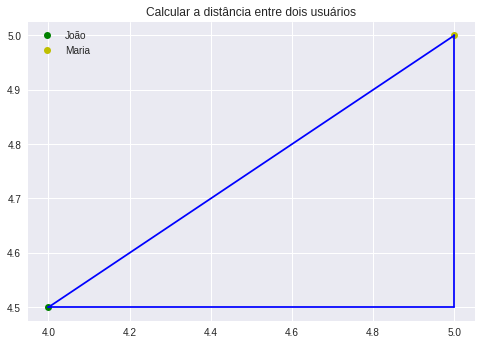

In [23]:
import matplotlib.pyplot as plt
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.legend(["João", "Maria"])
plt.title("Calcular a distância entre dois usuários")

plt.plot([4, 5], [4.5, 4.5], color="b", linestyle="-")
plt.plot([4, 5], [4.5, 5], color="b", linestyle="-")
plt.plot([5, 5], [4.5, 5], color="b", linestyle="-")

In [26]:
import numpy as np

joao = np.array([4, 4.5])
maria = np.array([5, 5])

joao - maria

array([-1. , -0.5])

In [28]:
from math import sqrt

def pitagoras(a,b):
  (delta_x, delta_y) = a - b
  return sqrt(delta_x * delta_x + delta_y * delta_y)

pitagoras(joao, maria)

1.118033988749895

In [31]:
def pitagoras(a,b):
  return np.linalg.norm(a - b)

pitagoras(joao, maria)

1.118033988749895

Text(0.5,1,'Calcular a distância entre usuários')

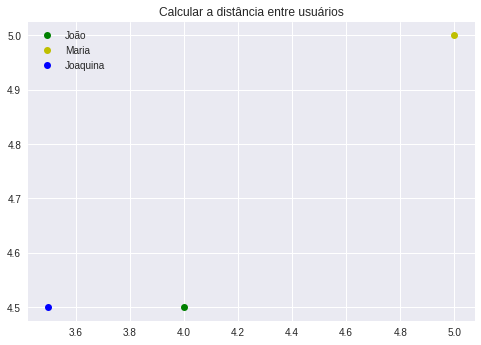

In [33]:
import matplotlib.pyplot as plt
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")
plt.plot(3.5, 4.5, "bo")
plt.legend(["João", "Maria", "Joaquina"])
plt.title("Calcular a distância entre usuários")


In [36]:
joaquina = np.array([3.5, 4.5])

print(pitagoras(joao, maria))
print(pitagoras(joao, joaquina))

1.118033988749895
0.5


In [0]:
def distancia(a,b):
  return np.linalg.norm(a - b)
